<a href="https://colab.research.google.com/github/st-le/pytorch_deep_learning/blob/master/hello_nn_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TODO**: document the vanishing gradient and the fix. Hint: revert this

some imports


In [0]:
import torch.optim as optim 
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import cv2

someone mnist model

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

class dumbNet(nn.Module):
  def __init__(self):
    super(dumbNet, self).__init__()
    # self.ln1 = nn.Linear(784,128)
    # self.ln2 = nn.Linear(128,10)
    self.ln1 = nn.Linear(2352, 784)
    self.ln2 = nn.Linear(784,10)

  def forward(self,x):
    x = self.ln1(x)
    
    x = F.relu(x)    
    
    x = self.ln2(x)
    
    x = F.relu(x)
    x = F.softmax(x)
    return x

  def relu2_out(self, x):
    x = self.ln1(x)
    x = F.relu(x)
    x = self.ln2(x)
    x = F.relu(x)
    return x

get some data

(28, 28)
(784,)
<class 'numpy.ndarray'>
gt is:  5
gt type is:  <class 'int'>


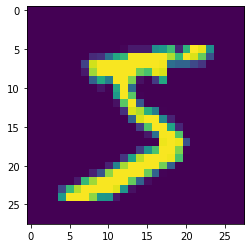

(28, 28)
uint8


In [3]:
from __future__ import print_function
import torch
import torch.nn as nn

from torchvision import datasets
# import datasets.MNIST as MNIST


from PIL import Image

# x = torch.rand(10)
# print(x)
mnist = datasets.MNIST('../sdata', download=True)
# mnist = datasets.MNIST('../sdata')
item = mnist.__getitem__(0) 
img = np.array(item[0])
y = item[1]
print(img.shape)
print(img.flatten().squeeze().shape)
print(type(img))
print('gt is: ', y)
print('gt type is: ', type(y))

inp = img.flatten().squeeze()
plt.imshow(img)
plt.show()

print(img.shape)
print(img.dtype)

create the data processing

In [0]:
# print(item[0].size)
# rgbimg = Image.new("RGBA", item[0].size)
# print(rgbimg.size)
# rgbimg.paste(img)


In [4]:
# rgbimg = Image.new("RGB", item[0].size)
# rgbimg.paste(img)
rgbimg = item[0]
rgbimg = np.array(rgbimg)
print(rgbimg.shape)
rgbimg = cv2.cvtColor(rgbimg, cv2.COLOR_GRAY2RGB)
rgbimg = Image.fromarray(np.uint8(rgbimg))

img_proc = transforms.Compose([
                                #  transforms.Resize(64),
                                 transforms.ToTensor(),
                                # transforms.Normalize(mean=[0.485,0.456], 
                                #                     std=[0.229,0.224])
                                #  transforms.Normalize(mean=[0.485,0.456,0.406], 
                                #                       std=[0.229,0.224,0.225])
])

print(item[0].size)
# im = img_proc(item[0])
im = img_proc(rgbimg)
print(np.array(im).shape)
print(np.array(rgbimg).shape)


(28, 28)
(28, 28)
(3, 28, 28)
(28, 28, 3)


create the model


In [0]:

# use a dumb net
# model = nn.Sequential(
#           nn.Linear(784,128),
#           nn.ReLU(),
#           nn.Linear(128,10),
#           nn.ReLU(),
#           nn.Softmax()
#         )
model = dumbNet()


# use someone mnist net 
# model = Net()

optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_fun = nn.CrossEntropyLoss()


inspect the model i.e. the init weights by histograms

Parameter containing:
tensor([[-0.0004,  0.0078,  0.0170,  ...,  0.0091,  0.0048,  0.0177],
        [ 0.0159, -0.0052, -0.0081,  ...,  0.0093, -0.0045, -0.0094],
        [ 0.0045, -0.0021, -0.0173,  ..., -0.0146,  0.0137, -0.0025],
        ...,
        [-0.0192,  0.0122, -0.0182,  ...,  0.0083,  0.0169,  0.0064],
        [-0.0038,  0.0127, -0.0191,  ...,  0.0055, -0.0041, -0.0198],
        [ 0.0145, -0.0193,  0.0124,  ...,  0.0193, -0.0022,  0.0046]],
       requires_grad=True)


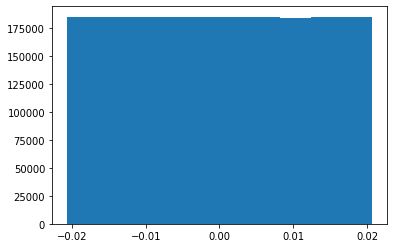

Parameter containing:
tensor([ 8.3248e-03,  1.7331e-02,  2.9815e-03,  1.3010e-02,  1.8896e-02,
        -1.2434e-02, -4.2108e-03, -3.2113e-04, -1.3072e-02, -1.2603e-03,
         9.9440e-03,  3.7108e-03, -4.1024e-03,  2.6812e-03,  1.2680e-02,
         1.2590e-02,  2.0349e-02, -3.7728e-03,  1.4029e-02,  8.4541e-03,
         5.4143e-03,  1.7809e-02,  1.2655e-02,  2.3809e-03,  1.3161e-03,
         1.6886e-02, -2.6629e-03,  6.0364e-03, -8.2944e-03, -7.7959e-03,
         1.3369e-02,  2.0379e-02,  2.0046e-02,  1.6418e-02, -1.3582e-02,
        -1.0744e-03, -2.0084e-02,  1.8686e-04, -6.9653e-03, -1.1771e-02,
         2.9576e-03,  1.2149e-04, -6.8842e-03,  1.4252e-02,  2.0139e-02,
         1.8191e-02,  6.1266e-03,  5.4529e-03,  1.1032e-03,  1.2134e-02,
        -1.5289e-02,  8.2353e-03, -1.4611e-02,  2.5219e-03,  7.5607e-03,
         7.4189e-03,  1.3973e-03, -2.1825e-03,  8.0664e-04, -5.5027e-03,
        -1.7736e-02,  5.1378e-03, -1.7312e-02, -1.8913e-02,  9.4865e-03,
        -1.4152e-02, -9.2622e

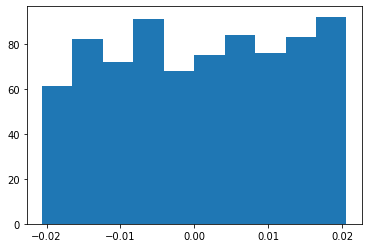

Parameter containing:
tensor([[-0.0102,  0.0212, -0.0087,  ...,  0.0219,  0.0299, -0.0087],
        [ 0.0066,  0.0100, -0.0200,  ...,  0.0035, -0.0325,  0.0170],
        [-0.0012, -0.0294, -0.0251,  ..., -0.0323, -0.0217, -0.0323],
        ...,
        [-0.0349,  0.0070,  0.0098,  ..., -0.0209,  0.0048, -0.0070],
        [ 0.0270, -0.0051, -0.0104,  ..., -0.0197,  0.0168,  0.0293],
        [-0.0084,  0.0071, -0.0297,  ...,  0.0140, -0.0216, -0.0018]],
       requires_grad=True)


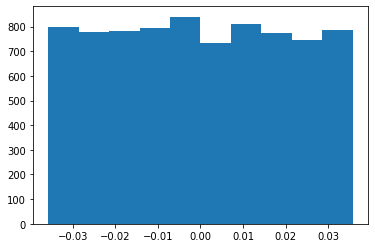

Parameter containing:
tensor([-0.0230,  0.0060, -0.0223,  0.0207,  0.0055, -0.0135,  0.0004, -0.0314,
         0.0036,  0.0246], requires_grad=True)


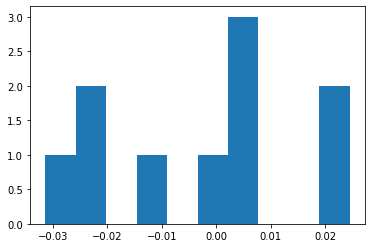

In [6]:
# for name, param in model.named_parameters():
#   print(name, ' --> ', param) 
for param in model.parameters():
  print(param)
  w = param.cpu().detach().numpy()
  counts, bins = np.histogram(w)
  _ = plt.hist(bins[:-1], bins, weights=counts)
  plt.show()

run one forward pass

**BUG**

the bug can be **FOUND** here. High chance it requires normalization of input **values**

In [7]:
if torch.cuda.is_available():
  print("cuda is available")
  device = torch.device("cuda")
else:
  print("cuda is NOT available")
  device = torch.device("cpu")

# device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model.to(device)

for i, batch in enumerate(mnist): 
  pimg, target = batch
  # print(target)
  # plt.imshow(img)
  # plt.show()
  # img = np.array(pimg)
  pimg = np.array(pimg)
  rgbimg = cv2.cvtColor(pimg, cv2.COLOR_GRAY2RGB)
  rgbimg = Image.fromarray(np.uint8(rgbimg))

  # gpu_img = torch.tensor(img.flatten().astype('float32'))
  # gpu_img = gpu_img.to(device)
  # gpu_img = transforms(rgbimg)
  gpu_img = img_proc(rgbimg)
  gpu_img = gpu_img.to(device)
  gpu_img = torch.reshape(gpu_img, (1,2352))
  target = torch.tensor(np.array([target]).astype('int64'))
  target = target.to(device) 

  output = model(gpu_img)
  output = output.view(1, 10)
  rl2_o = model.relu2_out(gpu_img)
  
  loss = loss_fun(output, target)
  print('target = ', target)
  # print('rl2 out = ', rl2_o)
  # print('out=',output)
  print('loss=', loss)
  print()
  if i == 20 : break

# data = torch.tensor(img.flatten().astype('float32'))
# output = model(data)
# output = output.view(1, 10)

# print(output)
# print(output.shape)
# # print(target)

# celoss = nn.CrossEntropyLoss()
# target = torch.tensor(np.array([y]).astype('int64'))

# loss = celoss(output, target)
# print(loss)
# print(loss.detach().numpy())

cuda is available
cuda
target =  tensor([5], device='cuda:0')
loss= tensor(2.3034, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([0], device='cuda:0')
loss= tensor(2.3039, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([4], device='cuda:0')
loss= tensor(2.3035, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([1], device='cuda:0')
loss= tensor(2.3061, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([9], device='cuda:0')
loss= tensor(2.3038, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([2], device='cuda:0')
loss= tensor(2.3023, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([1], device='cuda:0')
loss= tensor(2.3046, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([3], device='cuda:0')
loss= tensor(2.2946, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([1], device='cuda:0')
loss= tensor(2.3047, device='cuda:0', grad_fn=<NllLossBackward>)

target =  tensor([4], device='cu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


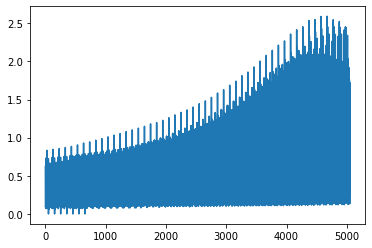

In [8]:

n_epoch = 50
n_step = 100
loss_arr = []
grad_arr = []
model.train()
for epoch in range(n_epoch) :
  for i, batch in enumerate(mnist): 
    optimizer.zero_grad()

    pimg, target = batch
    # print(target)
    # plt.imshow(img)
    # plt.show()
    # img = np.array(pimg)
    pimg = np.array(pimg)
    rgbimg = cv2.cvtColor(pimg, cv2.COLOR_GRAY2RGB)
    rgbimg = Image.fromarray(np.uint8(rgbimg))

    # gpu_img = torch.tensor(img.flatten().astype('float32'))
    # gpu_img = gpu_img.to(device)
    # gpu_img = transforms(rgbimg)
    gpu_img = img_proc(rgbimg)
    gpu_img = gpu_img.to(device)
    gpu_img = torch.reshape(gpu_img, (1,2352))
    target = torch.tensor(np.array([target]).astype('int64'))
    target = target.to(device) 

    output = model(gpu_img)
    output = output.view(1, 10)
    rl2_o = model.relu2_out(gpu_img)
    
    loss = loss_fun(output, target)

    # img, target = batch
    # # print(target)
    # # plt.imshow(img)
    # # plt.show()
    # img = np.array(img)
    # gpu_img = torch.tensor(img.flatten().astype('float32'))
    # gpu_img = gpu_img.to(device)
    # target = torch.tensor(np.array([target]).astype('int64'))
    # target = target.to(device)

    # output = model(gpu_img)
    # output = output.view(1, 10)
    # # print(output)
   
    # loss = loss_fun(output, target)

    # loss_arr.append(loss.detach().numpy()) # 1.
    loss_arr.append(loss.data.item()) # 2.

    loss.backward()
    optimizer.step()

    # check grad
    for param in model.parameters():
      g = param.grad.cpu().detach().numpy()
      grad_arr.append(np.linalg.norm(g))
      break

    #  check weights
    # for param in model.parameters():
    #   w = param.cpu().detach().numpy()
    #   counts, bins = np.histogram(w)
    #   plt.hist(bins[:-1], bins, weights=counts)
    #   plt.show()
    #   break

    #   print(param.requires_grad)
    if i == n_step: break
plt.plot(grad_arr)
plt.show()

draw graphs

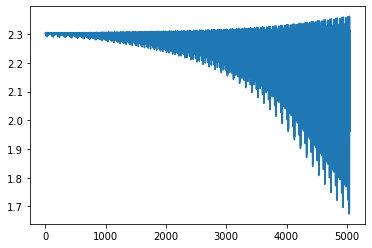

In [9]:
plt.plot(loss_arr)

test prediction

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
idx =  826


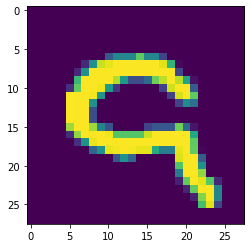

6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [34]:
labels = [i for i in range(10)]
print(labels)

i = np.random.randint(1000)
print('idx = ', i)
pimg, _ = mnist.__getitem__(i)
plt.imshow(pimg)
plt.show()
pimg = np.array(pimg)
rgbimg = cv2.cvtColor(pimg, cv2.COLOR_GRAY2RGB)
rgbimg = Image.fromarray(np.uint8(rgbimg))

# # gpu_img = torch.tensor(img.flatten().astype('float32'))
# # gpu_img = gpu_img.to(device)
# gpu_img = transforms(rgbimg)
gpu_img = img_proc(rgbimg)
gpu_img = gpu_img.to(device)
gpu_img = torch.reshape(gpu_img, (1,2352))
# target = torch.tensor(np.array([target]).astype('int64'))
# target = target.to(device) 

output = model(gpu_img)
output = output.view(1, 10)
print(labels[output.argmax()])



inspect backward 

In [11]:
loss.backward()

for name, param in model.named_parameters():
  print(name, ' --> ', param) 
  print(param.grad)

RuntimeError: ignored

one update step


In [0]:
# 
input = torch.randn(3, 5, requires_grad=True)
print(input)
print(input.shape)
target = torch.randint(5, (3,), dtype=torch.int64)
print(target)
loss = nn.functional.cross_entropy(input, target)
print(loss)